In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def slowdown(rho, factor):
    return 1 - (1-factor)/2 + rho*(factor-1)/2

In [4]:
factor = 0.7

In [5]:
densities = np.linspace(0,1,100)
factors = slowdown(densities, factor)

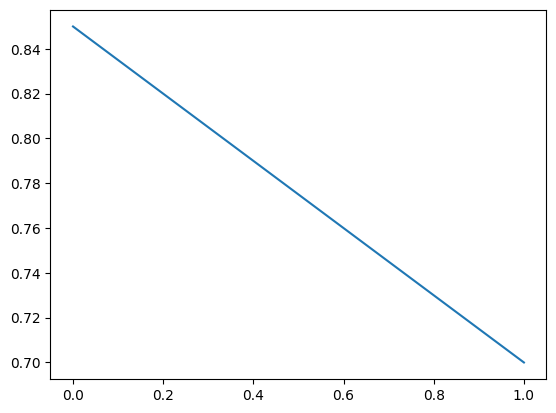

In [6]:
plt.plot(densities, factors)

In [7]:
slowdown(1, 0.7)

0.7

In [8]:
import torch

In [9]:
N = 6
pad = 2
dx = torch.tensor(1 / (N+2*pad))
L = 50
b = 1
N_internal = N*b + (b-1) * 2*pad
N_full = N_internal +  2*pad
j = torch.arange(0, N_full, 1)

x =  (j + 1/2) * dx 
x*L # midpoints of cell
# Interfaces located at 
(x[:-1] + 1/2 * dx) * L


tensor([ 5.0000, 10.0000, 15.0000, 20.0000, 25.0000, 30.0000, 35.0000, 40.0000,
        45.0000])

In [10]:
N = 1
pad = 2
dx = torch.tensor(1 / (N+2*pad))
L = 25
b = 1
N_internal = N*b + (b-1) * 2*pad
N_full = N_internal +  2*pad
j = torch.arange(0, N_full, 1)

x =  (j + 1/2) * dx 
x*L # midpoints of cell
# Interfaces located at 
(x[:-1] + 1/2 * dx) * L

tensor([ 5.0000, 10.0000, 15.0000, 20.0000])

In [11]:
N = 10
xL = 0
xR = 1
dx = (xR - xL) / ( N + 1 )
xj = [xL + (j+1/2)*dx for j in range(N+1)]
midpoint = [xL + j*dx for j in range(N+2)]
midpoint

[0.0,
 0.09090909090909091,
 0.18181818181818182,
 0.2727272727272727,
 0.36363636363636365,
 0.4545454545454546,
 0.5454545454545454,
 0.6363636363636364,
 0.7272727272727273,
 0.8181818181818182,
 0.9090909090909092,
 1.0]

#### Different ways of initializing the grid:

1. Internal cells span the entire road:

Suppose there are N internal cells, and that the left and right edges of the interval is given by 0 and 1. Then, we define the grid length $\Delta x$ as 
$$
\Delta x = \frac{1}{N}.
$$

We also define the midpoints of the cells as 
$$
x_j = (j+1/2) \Delta x, \text{ for } j = 0, 1, ..., N -1.
$$
Finally, we define the interfaces of the cells as 
$$
x_{j-1/2} = j \Delta x, \text{ for } j = 0, 1, ..., N.
$$

Depending on the order of the scheme in use, we also need some boundary cells.
For a first order scheme, we define the two ghost cells 
$$
\mathcal{C}_0 = [-\Delta x, 0), \quad \mathcal{C}_{N+1} = [1, 1+\Delta x).
$$
For a second order scheme, we define the additional ghost cells 
$$
\mathcal{C}_{-1} = [-2\Delta x, -2\Delta x), \quad \mathcal{C}_{N+1} = [1+\Delta x, 2+\Delta x).
$$

2. Boundary cells are also situated on the road:

In [12]:
# Example
N = 5
pad = 2
L = 25
b = 2

dx = 1 / N
n_full = b*N + 2 * pad

j = torch.arange(-pad, b*N+pad, 1)
x = (j+1/2) * dx
x

tensor([-0.3000, -0.1000,  0.1000,  0.3000,  0.5000,  0.7000,  0.9000,  1.1000,
         1.3000,  1.5000,  1.7000,  1.9000,  2.1000,  2.3000])

In [13]:
print(len(j))
print(b*N + 2 * pad)

14
14


In [17]:
torch.arange(1,3,1)

tensor([1, 2])

In [29]:
n = 5
b = 2
a = n / b
x = torch.arange(b/n*1/2,b + b/n*1/2, b/n)
pos = a*x - 1/2
for i in range(len(x)):
    print(x[i], pos[i])

tensor(0.2000) tensor(0.)
tensor(0.6000) tensor(1.)
tensor(1.) tensor(2.)
tensor(1.4000) tensor(3.)
tensor(1.8000) tensor(4.)
